In [2]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import random as rnd

%matplotlib inline

C:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


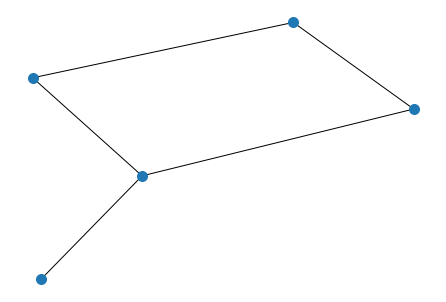

In [3]:
G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(1,3),(2,4),(3,4)])
nx.draw(G,node_size=100,width=1)

In [4]:
def simulate(G,beta,gamma,z):
    print("z = ",z)
    ztemp = z
    for edge in G.edges():
        print("edge = ",edge)
        #print("edge[0] =",edge[0])
        #print("edge[1] =",edge[1])
        print("z[",edge[0],"] =",z[edge[0]])
        print("z[",edge[1],"] =",z[edge[1]])
        print("ztemp[",edge[0],"] =",ztemp[edge[0]])
        print("ztemp[",edge[1],"] =",ztemp[edge[1]])
        if int(z[edge[0]]) == 1 and int(z[edge[1]]) == 0:
            if rnd.random() > beta:
                ztemp[edge[1]] = 1
                print("infection spread from node",edge[0],"to",edge[1])
            else:
                print("infection did not spread from node",edge[0],"to",edge[1])
        if int(z[edge[1]]) == 1 and int(z[edge[0]]) == 0:
            if rnd.random() < beta:
                ztemp[edge[0]] = 1
                print("infection spread from node",edge[1],"to",edge[0])
            else:
                print("infection did not spread from node",edge[1],"to",edge[0])
        print("z after infections = ",z)
        print("ztemp after infections = ",ztemp)
    for node in G:
        if z[node] == 1:
            print("node = ",node)
            if rnd.random() < gamma:
                ztemp[node] = 2
                print("node",node,"recovered")
            else:
                print("node",node,"did not recover")
    print("z after recoveries = ",z)
    print("ztemp after recoveries = ",ztemp)
    z = ztemp

In [6]:
z = np.zeros(len(G))
OL = rnd.randint(0,len(G)-1)
z[OL] = int(1) 
while (1 in z):
    simulate(G,0.5,0.25,z)


z =  [0. 0. 0. 0. 1.]
edge =  (0, 1)
z[ 0 ] = 0.0
z[ 1 ] = 0.0
ztemp[ 0 ] = 0.0
ztemp[ 1 ] = 0.0
z after infections =  [0. 0. 0. 0. 1.]
ztemp after infections =  [0. 0. 0. 0. 1.]
edge =  (1, 2)
z[ 1 ] = 0.0
z[ 2 ] = 0.0
ztemp[ 1 ] = 0.0
ztemp[ 2 ] = 0.0
z after infections =  [0. 0. 0. 0. 1.]
ztemp after infections =  [0. 0. 0. 0. 1.]
edge =  (1, 3)
z[ 1 ] = 0.0
z[ 3 ] = 0.0
ztemp[ 1 ] = 0.0
ztemp[ 3 ] = 0.0
z after infections =  [0. 0. 0. 0. 1.]
ztemp after infections =  [0. 0. 0. 0. 1.]
edge =  (2, 4)
z[ 2 ] = 0.0
z[ 4 ] = 1.0
ztemp[ 2 ] = 0.0
ztemp[ 4 ] = 1.0
infection spread from node 4 to 2
z after infections =  [0. 0. 1. 0. 1.]
ztemp after infections =  [0. 0. 1. 0. 1.]
edge =  (3, 4)
z[ 3 ] = 0.0
z[ 4 ] = 1.0
ztemp[ 3 ] = 0.0
ztemp[ 4 ] = 1.0
infection spread from node 4 to 3
z after infections =  [0. 0. 1. 1. 1.]
ztemp after infections =  [0. 0. 1. 1. 1.]
node =  2
node 2 did not recover
node =  3
node 3 did not recover
node =  4
node 4 did not recover
z after recoveries =  [0. 